## 1. Sistema LTI de Tempo Contínuo

Considere um sistema de tempo **LTI**, contínuo e causal, cuja função de transferência é dada por:

$$
H(s) = \frac{2s + 3}{s^{2} + 2s + 5}
$$

### a) Simulação numérica

Utilizando cálculo numérico, simule a resposta desse sistema de tempo contínuo quando a entrada é o **degrau unitário**.

### b) Diagrama de polos e zeros

Utilizando algum algoritmo computacional (por exemplo, Python com a biblioteca `control`), apresente o **diagrama de polos e zeros** para esse sistema e, a partir dele, discuta a **estabilidade do sistema**.


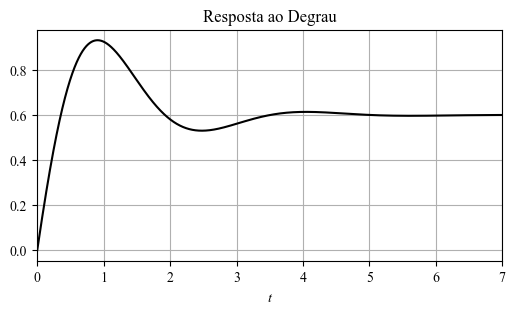

In [2]:
import numpy as np
import control as control
import matplotlib.pyplot as plt

#Muda a fonte dos Plots para Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = "Times New Roman"
plt.rcParams['mathtext.it'] = "Times New Roman:italic"
plt.rcParams['mathtext.bf'] = "Times New Roman:bold"

num = np.array([2, 3])
den = np.array([1 , 2, 5])
H = control.tf(num , den)

t0 = 0
tend = 7
dt = 1e-4
Npoints = int((tend - t0)/dt)
t = np.linspace(t0,tend,Npoints)

_, sr = control.step_response(H, t)

plt.figure(figsize=(6,3))
plt.plot(t, sr, 'k')
plt.title("Resposta ao Degrau")
plt.xlabel("$t$")
plt.grid()
plt.xlim(t0,tend)
plt.show()

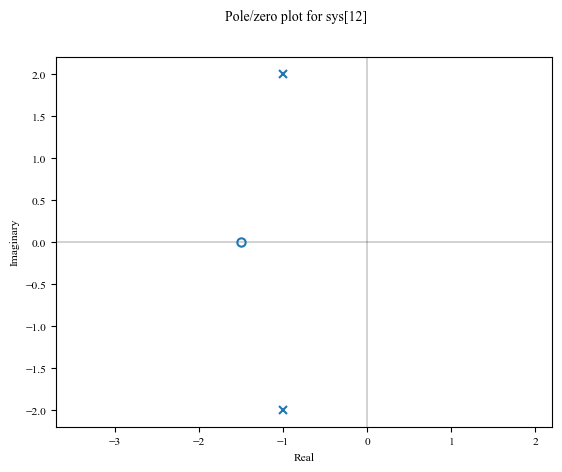

In [9]:
control.pzmap(H)

por todos os Polos estarem no SPE, o sistema é estavel

### Questão 2

**Função de Transferência dada:**
$$H(s) = \frac{16}{s^2 + 4s + 16}$$

---

#### **Itens:**

**a)** Calcule os valores de $\omega_n$ e $\zeta$ e verifique que o sistema é subamortecido.


---

Igualando o termo omega com o valor da função dada:
$$\omega_n^2 = 16 \implies \omega_n = \sqrt{16} = \mathbf{4 \text{ rad/s}}$$

Igualando o termo que multiplica $s$ com o valor da função dada:
$$2\zeta\omega_n = 4$$
Substituindo $\omega_n = 4$:
$$2\zeta(4) = 4 \implies \zeta = \frac{1}{2} = \mathbf{0.5}$$

---

como $\zeta = 0.5$
então $0 < \zeta < 1$, portanto **Subamortecido**.

**b)** Utilizando algum algoritmo de computador, apresente o diagrama de polos e zeros para esse sistema e a partir desse, discuta a estabilidade do sistema.

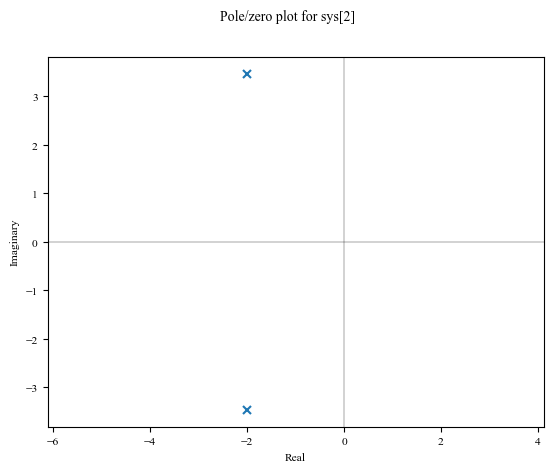

In [3]:
import numpy as np
import control as control
import matplotlib.pyplot as plt

#Muda a fonte dos Plots para Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = "Times New Roman"
plt.rcParams['mathtext.it'] = "Times New Roman:italic"
plt.rcParams['mathtext.bf'] = "Times New Roman:bold"

num = np.array([16])
den = np.array([1 , 4, 16])
H = control.tf(num , den)
control.pzmap(H)

por todos os Polos estarem no SPE, o sistema é estavel


**c)** Calcule os valores do tempo de subida, tempo de pico, sobressinal e o tempo de acomodação para esse sistema.


$$\omega_d = \omega_n \sqrt{1 - \zeta^2}$$
$$\omega_d = 4 \sqrt{1 - 0.5^2} = 4\sqrt{0.75} \approx \mathbf{3.464 \text{ rad/s}}$$

---

#### **1.($t_r$):**

$$t_r = \frac{3.1416 - \arccos(0.5)}{3.464}$$
$$t_r = \frac{3.1416 - 1.0472}{3.464} = \frac{2.0944}{3.464}$$
$$\mathbf{t_r = 0.605 \text{ s}}$$

#### **2.($t_p$):**

$$t_p = \frac{3.1416}{3.464}$$
$$\mathbf{t_p = 0.907 \text{ s}}$$

#### **3.($M_p$):**

$$M_p(\%) = 100 \cdot e^{\left( -\frac{0.5 \cdot 3.1416}{\sqrt{0.75}} \right)}$$
$$M_p(\%) = 100 \cdot e^{-1.8138}$$
$$M_p(\%) = 100 \cdot 0.163$$
$$\mathbf{M_p = 16.3 \%}$$

#### **4.($t_s$):**

$$t_s = \frac{3}{0.5 \times 4}$$
$$t_s = \frac{3}{2}$$
$$\mathbf{t_s = 1.5 \text{ s}}$$

**d)** Simule a saída do sistema quando a entrada é o degrau. Verifique graficamente os valores de tempo de subida, tempo de pico, sobressinal e o tempo de acomodação.

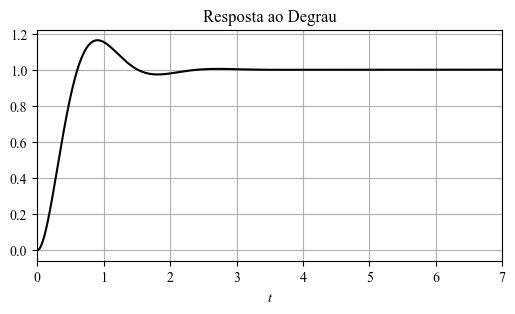

In [4]:
t0 = 0
tend = 7
dt = 1e-4
Npoints = int((tend - t0)/dt)
t = np.linspace(t0,tend,Npoints)

_, sr = control.step_response(H, t)

plt.figure(figsize=(6,3))
plt.plot(t, sr, 'k')
plt.title("Resposta ao Degrau")
plt.xlabel("$t$")
plt.grid()
plt.xlim(t0,tend)
plt.show()

### Questão 3

Considere o sistema de controle apresentado na Figura 2. Supondo que deseja-se que o sistema em malha fechada possua um **sobressinal máximo de 20%** e um **tempo de subida de 0,3s**.

**Estrutura do Diagrama (Figura 2):**
* **Entrada:** $r(t)$
* **Saída:** $y(t)$
* **Bloco de Vante (Planta):** $\displaystyle \frac{K_p}{s(s+1)}$
* **Bloco de Realimentação:** $1 + K_d s$

---

**a)** Determine os valores de $K_p$ e $K_d$ que atendem essas condições.

In [13]:
Mp = 0.20
tr = 0.3

ln_Mp = np.log(Mp)
zeta = np.sqrt( (ln_Mp**2) / (np.pi**2 + ln_Mp**2) )

print(f"zeta: {zeta:.4f}")

sqrt_term = np.sqrt(1 - zeta**2)

wd = (np.pi - np.arccos(zeta)) / (tr * sqrt_term)

print(f"wn: {wd:.4f} rad/s")

Kp = wn**2

Kd = (2 * zeta * wn - 1) / Kp

print(f"Kp = {Kp:.4f}")
print(f"Kd = {Kd:.4f}")

zeta: 0.4559
wn: 7.6563 rad/s
Kp = 58.6184
Kd = 0.1020


**b)** Considerando os valores de $K_p$ e $K_d$ calculados no item anterior, determine os valores do tempo de subida e o tempo de acomodação do sistema em malha fechada.

In [25]:
print(f"tp = {np.pi / wn:.4f}")
print(f"ts = {3/(zeta*Kp):.4f}")

tp = 0.4103
ts = 0.1122



**c)** Simule o sistema de controle em malha fechada considerando que a referência é o degrau unitário. Verifique graficamente os valores de tempo de subida, tempo de pico, sobressinal e o tempo de acomodação.

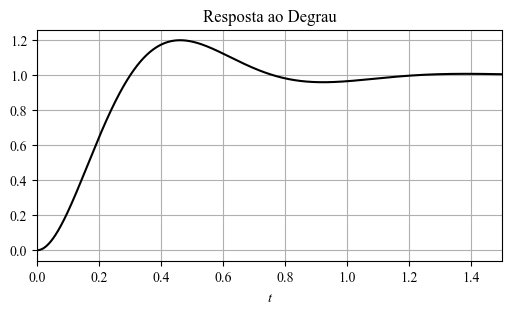

In [23]:
import numpy as np
import control as control
import matplotlib.pyplot as plt

#Muda a fonte dos Plots para Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = "Times New Roman"
plt.rcParams['mathtext.it'] = "Times New Roman:italic"
plt.rcParams['mathtext.bf'] = "Times New Roman:bold"

num = np.array([Kp])
den = np.array([1 , (1 + Kp*Kd), Kp])
H = control.tf(num , den)

t0 = 0
tend = 1.5
dt = 1e-4
Npoints = int((tend - t0)/dt)
t = np.linspace(t0,tend,Npoints)

_, sr = control.step_response(H, t)

plt.figure(figsize=(6,3))
plt.plot(t, sr, 'k')
plt.title("Resposta ao Degrau")
plt.xlabel("$t$")
plt.grid()
plt.xlim(t0,tend)
plt.show()

### Questão **4.** 
Considere um sistema linear e invariante no tempo estável descrito pela seguinte equação diferencial:

$$\frac{d^2}{dt^2}y(t) + 5\frac{d}{dt}y(t) + 6y(t) = -\frac{d}{dt}x(t)$$

**a)** Utilizando alguma linguagem de programação, plote o gráfico da resposta em magnitude e resposta em fase para esse sistema.

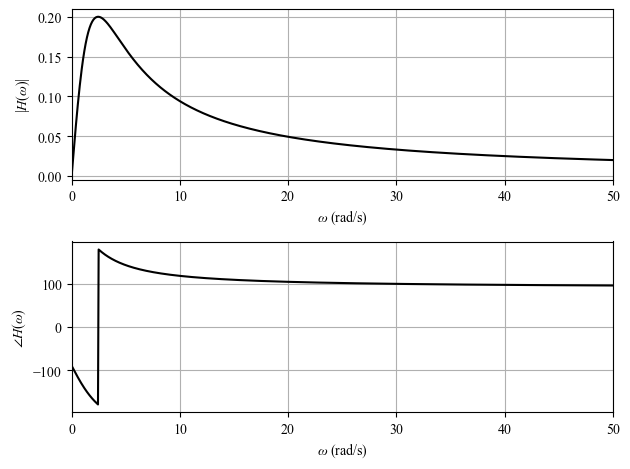

In [148]:
import scipy.signal as signal

num = [-1, 0]
den = [1, 5, 6]
Hs = signal.TransferFunction(num, den)

w = np.linspace(-10,50,1000)
_, Hw = signal.freqresp(Hs, w)

plt.figure()
plt.subplot(2,1,1)
plt.plot(w,np.abs(Hw),'k')
plt.xlabel('$\\omega$ (rad/s)')
plt.ylabel('$|H(\\omega)|$')
plt.grid()
plt.xlim(0,max(w));

plt.subplot(2,1,2)
plt.plot(w,np.angle(Hw)*180/np.pi,'k')
plt.xlabel('$\\omega$ (rad/s)')
plt.ylabel('$\\angle H(\\omega)$')
plt.grid()
plt.xlim(0,max(w));
plt.tight_layout()


**b)** Analisando o resultado obtido no item (b)*, classifique o sistema em (i) passa-baixas, (ii) passa-altas, (iii) rejeita-faixas ou (iv) passa-faixas.


acredito ser um paixa faixas, pois proximo ao zero as frequencias são rejeitadas

Aqui está a transcrição do conteúdo das imagens para Markdown.

---

### Questão 5

A modulação em amplitude convencional consiste em gerar um sinal modulado $\varphi_{AM}(t)$ tal que:

$$\varphi_{AM}(t) = [K + m(t)] \cos(2\pi f_c t)$$

sendo $m(t)$ o sinal modulante, $f_c$ a frequência da portadora e $K$ uma constante.

**a)** Admitindo que o sinal $x(t) = m(t) + \cos(2\pi f_c t)$ é aplicado em um elemento não-linear cuja saída é dada por:

$$y(t) = x(t) + \frac{1}{2}x^2(t)$$

Determine a expressão que relaciona o espectro de $y(t)$ com o espectro de $m(t)$.

### **Expansão**

$$y(t) = [m(t) + \cos(2\pi f_c t)] + \frac{1}{2}[m(t) + \cos(2\pi f_c t)]^2$$

$$y(t) = m(t) + \cos(2\pi f_c t) + \frac{1}{2}[m^2(t) + 2m(t)\cos(2\pi f_c t) + \cos^2(2\pi f_c t)]$$

$$y(t) = m(t) + \frac{1}{2}m^2(t) + \cos(2\pi f_c t) + m(t)\cos(2\pi f_c t) + \frac{1}{2}\cos^2(2\pi f_c t)$$

---

### **Transformadas de Fourier**

**Parte A:**
$$m(t) \longleftrightarrow M(f)$$

**Parte B:**
$$\frac{1}{2}m^2(t) \longleftrightarrow \frac{1}{2} [M(f) * M(f)]$$

**Parte C:**
$$\cos(2\pi f_c t) \longleftrightarrow \frac{1}{2}[\delta(f - f_c) + \delta(f + f_c)]$$

**Parte D:**
$$m(t)\cos(2\pi f_c t) \longleftrightarrow \frac{1}{2}[M(f - f_c) + M(f + f_c)]$$

**Parte E:**
Utilizando $\cos^2(\theta) = \frac{1}{2} + \frac{1}{2}\cos(2\theta)$:
$$\frac{1}{2}\cos^2(2\pi f_c t) = \frac{1}{4} + \frac{1}{4}\cos(4\pi f_c t)$$
$$\longleftrightarrow \frac{1}{4}\delta(f) + \frac{1}{8}[\delta(f - 2f_c) + \delta(f + 2f_c)]$$

---

### **Expressão Final do Espectro $Y(f)$**

$$Y(f) = M(f) + \frac{1}{2}[M(f)*M(f)] + \frac{1}{4}\delta(f) + \frac{1}{2}[\delta(f-f_c) + \delta(f+f_c)] + \frac{1}{2}[M(f-f_c) + M(f+f_c)] + \frac{1}{8}[\delta(f - 2f_c) + \delta(f + 2f_c)]$$

**b)** Demonstre que um sinal AM pode ser gerado filtrando-se o sinal $y(t)$ em um filtro passa-faixas. Determine a frequência central desse filtro, bem como sua largura de banda.

**Pela a a)**

$$Y(f) = M(f) + \frac{1}{2}[M(f)*M(f)] + \frac{1}{4}\delta(f) + \frac{1}{2}[\delta(f-f_c) + \delta(f+f_c)] + \frac{1}{2}[M(f-f_c) + M(f+f_c)] + \frac{1}{8}[\delta(f - 2f_c) + \delta(f + 2f_c)]$$

**Dimensionamento do Filtro Passa-Faixas**

* **Frequência Central ($f_0$):**
    Deve coincidir com a portadora do termo AM.
    $$f_0 = f_c$$

* **Largura de Banda ($B$):**
    $$B = (f_c + f_m) - (f_c - f_m) \implies B = 2f_m$$

---

**Filtragem e Recuperação do Sinal**

passando pelo passa-faixas, em $f_0$, ou seja,

$$S_{AM}(f) = \frac{1}{2}[\delta(f-f_c) + \delta(f+f_c)] + \frac{1}{2}[M(f-f_c) + M(f+f_c)]$$

Aplicando a Transformada Inversa $\mathcal{F}^{-1}\{S_{AM}(f)\}$:

$$s_{AM}(t) = \cos(2\pi f_c t) + m(t)\cos(2\pi f_c t)$$

$$s_{AM}(t) = [1 + m(t)]\cos(2\pi f_c t)$$

**c)** Utilizando alguma linguagem de programação, implemente o modulador AM proposto. Apresente os seguintes gráficos:
   i. Sinal de mensagem e sinal de portadora;
   ii. Espectro do sinal de mensagem e do sinal de portadora;
   iii. Sinal de saída do elemento não-linear;
   iv. Espectro de saída do sinal de saída do elemento não-linear;
   v. Sinal de saída do filtro passa-faixas;
   vi. Espectro de saída do sinal de saída do filtro passa-faixas.

Utilize como sinal modulante:

$$m(t) = \cos(2\pi f_m t)$$

com $f_m = 1 \text{ kHz}$, e como frequência de portadora $f_c = 10 \text{ kHz}$.

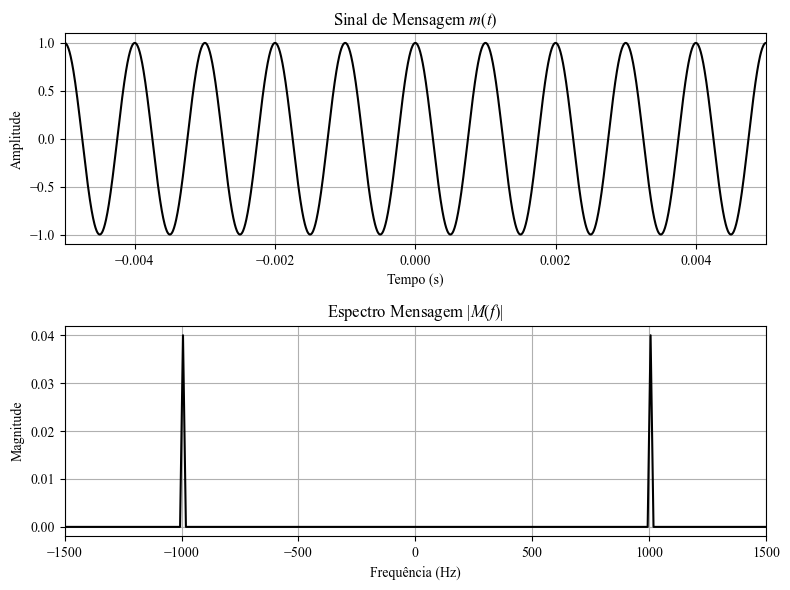

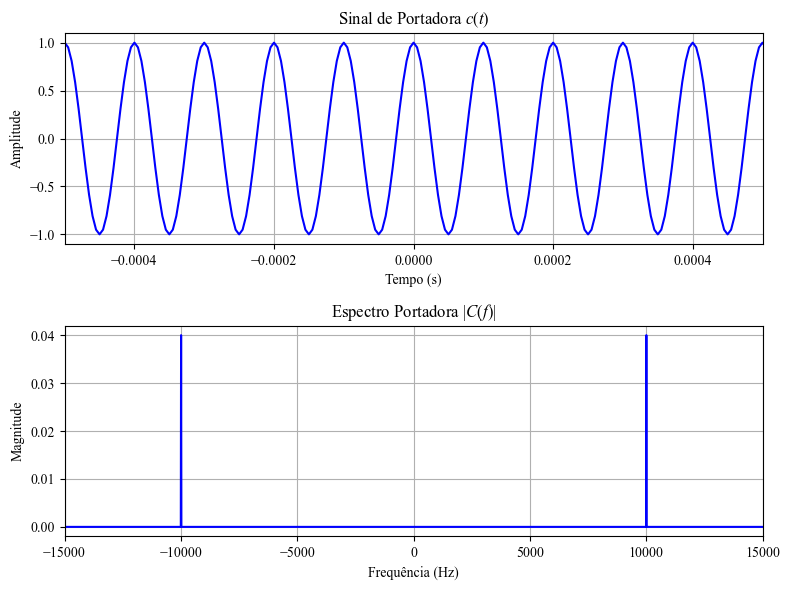

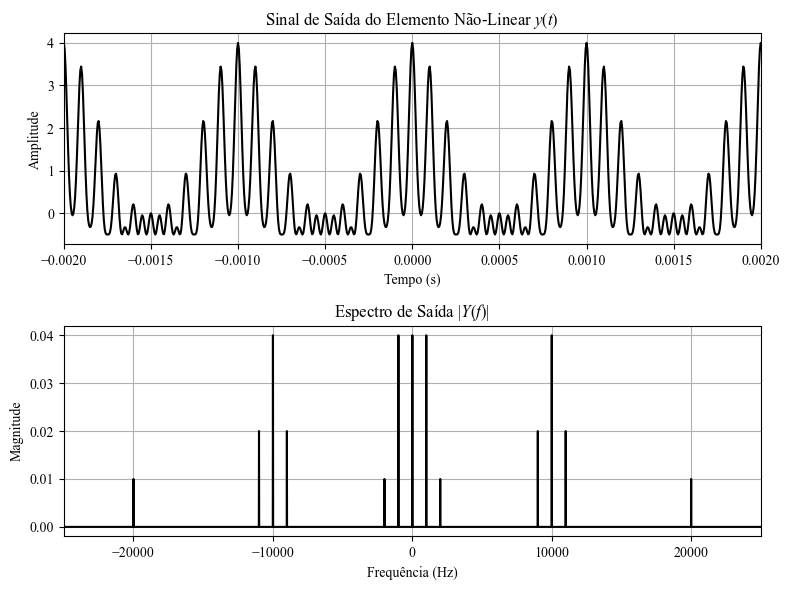

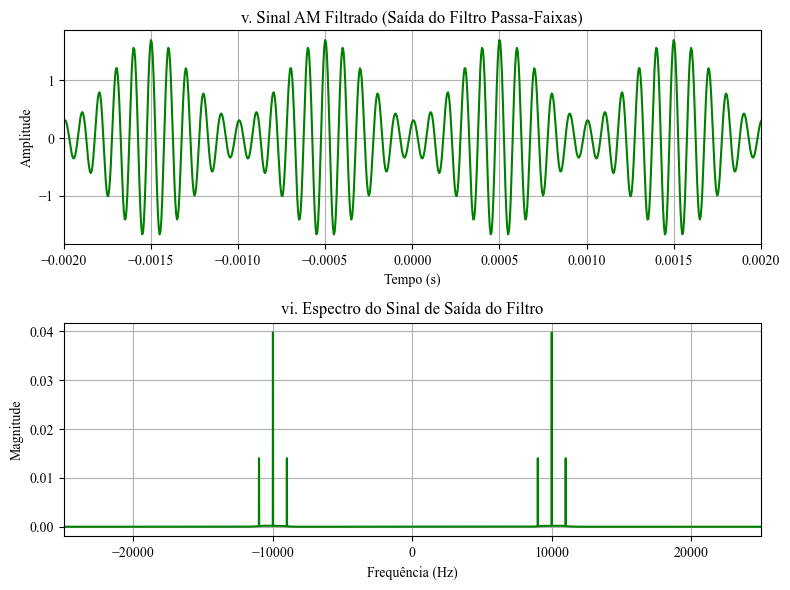

In [147]:
import numpy as np
import numpy.fft as fft
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

#Muda a fonte para Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = "Times New Roman"
plt.rcParams['mathtext.it'] = "Times New Roman:italic"
plt.rcParams['mathtext.bf'] = "Times New Roman:bold"

#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

fm = 1000   # Mensagem 1 kHz
fc = 10000  # Portadora 10 kHz

#Parametrizacao de simulacao
Fs = 200000 
Ts = 1/Fs   

t = np.arange(-0.04, 0.04, Ts) 

m_t = np.cos(2 * np.pi * fm * t)
c_t = np.cos(2 * np.pi * fc * t)

f_m, M_f = ctft(m_t, Ts)
f_c, C_f = ctft(c_t, Ts) 

plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
plt.plot(t, m_t, 'k')
plt.title('Sinal de Mensagem $m(t)$')
plt.ylabel('Amplitude')
plt.xlabel('Tempo (s)')
plt.xlim(-0.005, 0.005)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(f_m, np.abs(M_f), 'k') 
plt.title('Espectro Mensagem $|M(f)|$')
plt.ylabel('Magnitude')
plt.xlabel('Frequência (Hz)')
plt.xlim(-1500, 1500) 
plt.grid(True)
plt.tight_layout()

plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
plt.plot(t, c_t, 'b')
plt.title('Sinal de Portadora $c(t)$')
plt.ylabel('Amplitude')
plt.xlabel('Tempo (s)')
plt.xlim(-0.0005, 0.0005)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(f_c, np.abs(C_f), 'b') 
plt.title('Espectro Portadora $|C(f)|$')
plt.ylabel('Magnitude')
plt.xlabel('Frequência (Hz)')
plt.xlim(-15000, 15000) 
plt.grid(True)
plt.tight_layout()

plt.show()


x_t = m_t + c_t

y_t = x_t + 0.5 * (x_t**2)
f_y, Y_f = ctft(y_t, Ts)

plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
plt.plot(t, y_t, 'k')
plt.title('Sinal de Saída do Elemento Não-Linear $y(t)$')
plt.ylabel('Amplitude')
plt.xlabel('Tempo (s)')
plt.xlim(-0.002, 0.002)
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(f_y, np.abs(Y_f), 'k')
plt.title('Espectro de Saída $|Y(f)|$')
plt.ylabel('Magnitude')
plt.xlabel('Frequência (Hz)')
plt.xlim(-25000, 25000) 
plt.grid(True)

plt.tight_layout()
plt.show()

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y


corte_inferior = 9000
corte_superior = 11000 
sinal_am_filtrado = butter_bandpass_filter(y_t, corte_inferior, corte_superior, Fs, order=4)
f_am, AM_f = ctft(sinal_am_filtrado, Ts)

plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
plt.plot(t, sinal_am_filtrado, 'g')
plt.title('v. Sinal AM Filtrado (Saída do Filtro Passa-Faixas)')
plt.ylabel('Amplitude')
plt.xlabel('Tempo (s)')
plt.xlim(-0.002, 0.002) 
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(f_am, np.abs(AM_f), 'g')
plt.title('vi. Espectro do Sinal de Saída do Filtro')
plt.ylabel('Magnitude')
plt.xlabel('Frequência (Hz)')
plt.xlim(-25000, 25000) 
plt.grid(True)

plt.tight_layout()
plt.show()

Aqui está a transcrição da última imagem enviada (Questão 6) para Markdown:

**6.** Considere que deseja-se multiplexar em frequência três sinais $x_1(t)$, $x_2(t)$ e $x_3(t)$, definidos como:

$$x_1(t) = \cos(20\pi t)$$
$$x_2(t) = \cos(50\pi t)$$
$$x_3(t) = \cos(80\pi t)$$

Para isso, cada sinal é modulado AM-DSB-SC com frequências de sub-portadoras de $f_{c1} = 1100 \text{ Hz}$, $f_{c2} = 2200 \text{ Hz}$ e $f_{c3} = 3300 \text{ Hz}$, respectivamente. O sinal multiplexado então é transmitido em um esquema AM-DSB-SC utilizando uma frequência de portadora de $f_c = 25\text{kHz}$.

**a)** Proponha um esquema para o transmissor e o receptor para essa multiplexação por divisão em frequência. Deve ser possível transmitir todos os sinais em um mesmo canal de comunicações e no receptor, deve-se ser capaz de recuperar cada sinal individualmente.

#### **Cálculo das Frequências de Banda Base**
* **Sinal 1:** $x_1(t) = \cos(20\pi t) \implies f_1 = \frac{20\pi}{2\pi} = \mathbf{10 \text{ Hz}}$
* **Sinal 2:** $x_2(t) = \cos(50\pi t) \implies f_2 = \frac{50\pi}{2\pi} = \mathbf{25 \text{ Hz}}$
* **Sinal 3:** $x_3(t) = \cos(80\pi t) \implies f_3 = \frac{80\pi}{2\pi} = \mathbf{40 \text{ Hz}}$

---

#### **Esquema do Sistema**

**Passo 1: Modulação das Sub-Portadoras (Transmissor)**
Cada sinal de mensagem é modulado em AM-DSB-SC por sua respectiva sub-portadora ($f_{c1}, f_{c2}, f_{c3}$):
* $s_1(t) = x_1(t) \cdot \cos(2\pi \cdot 1100 \cdot t)$
* $s_2(t) = x_2(t) \cdot \cos(2\pi \cdot 2200 \cdot t)$
* $s_3(t) = x_3(t) \cdot \cos(2\pi \cdot 3300 \cdot t)$



**Passo 2: Multiplexação e Transmissão**
* $s_{FDM}(t) = s_1(t) + s_2(t) + s_3(t)$
* $x(t) = s_{FDM}(t) \cdot \cos(2\pi \cdot 25000 \cdot t)$

**Passo 3: Recepção e Separação (Receptor)**
1.  **Demodulação Principal:** Multiplicação por $\cos(2\pi \cdot 25000 \cdot t)$ seguida de Filtro Passa-Baixas (LPF) para recuperar $s_{FDM}(t)$.
2.  **Filtragem de Canal:** Aplicação de três Filtros Passa-Faixas centrados em 1100, 2200 e 3300 Hz para isolar cada $s_i(t)$.
3.  **Demodulação Final:** Multiplicação de cada canal isolado por sua sub-portadora original e filtragem passa-baixas para recuperar $x_1, x_2$ e $x_3$.
---

#### **III. Justificativa da Recuperação Individual**

* **1:** Ocupa de **1090 Hz a 1110 Hz** (Centrado em 1100).
* **2:** Ocupa de **2175 Hz a 2225 Hz** (Centrado em 2200).
* **3:** Ocupa de **3260 Hz a 3340 Hz** (Centrado em 3300).

**Portanto:**
Como os intervalos de frequência são separados por largas bandas de guarda, não há aliasing. Logo e possivel a recuperação deles.

**b)** Utilizando um algoritmo de computador, simule o sistema proposto. Apresente como resultados:  
   i. Forma de onda e espectro para os sinais $x_1(t)$, $x_2(t)$ e $x_3(t)$.   
   ii. Espectro dos sinais $x_1(t)$, $x_2(t)$ e $x_3(t)$ após a modulação com as sub-portadoras;   
   iii. Espectro do sinal multiplexado em frequência;  
   iv. Forma de onda e espectro dos sinais após a recepção.  

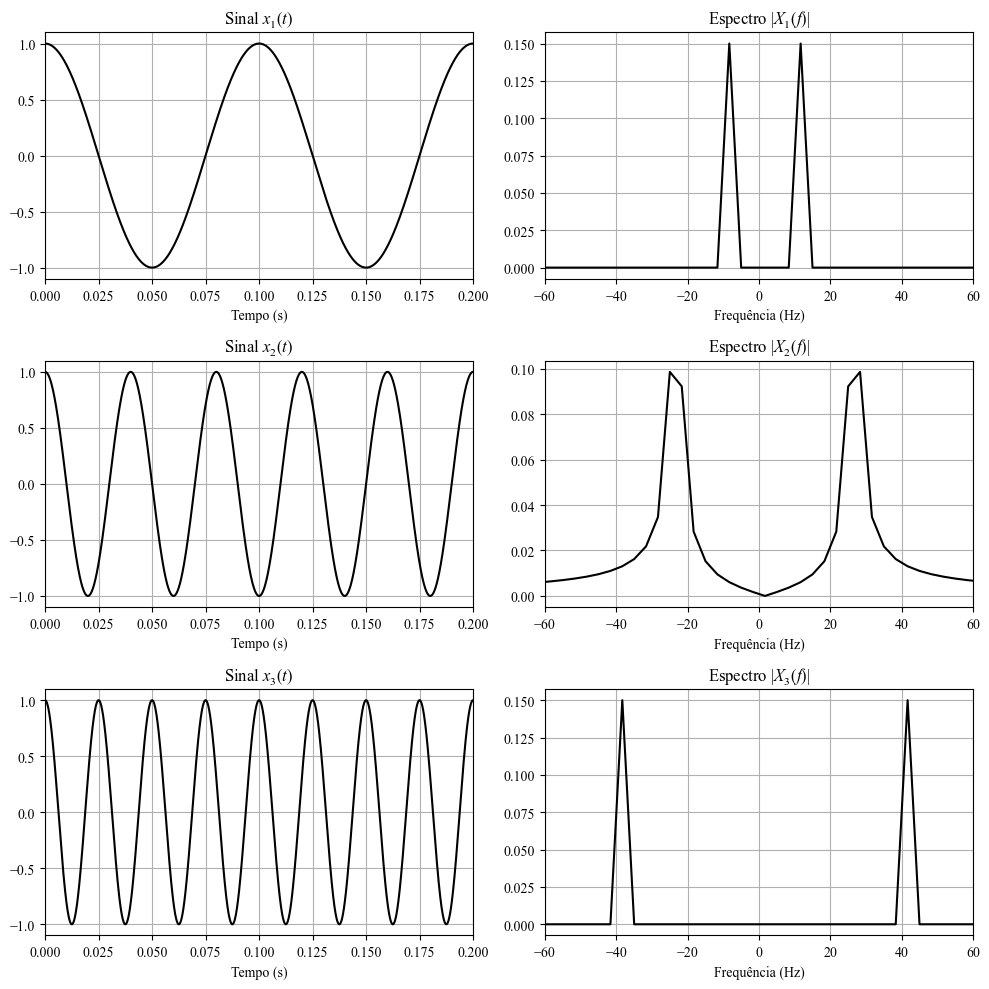

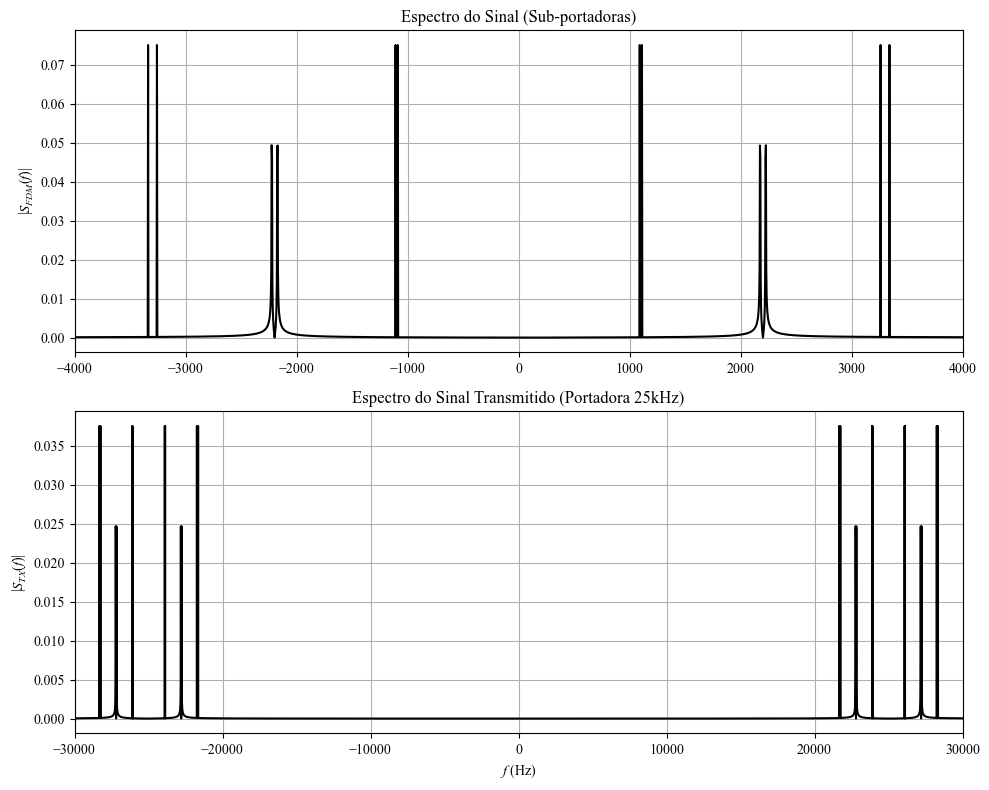

In [146]:
import numpy as np
import numpy.fft as fft
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

#Muda a fonte para Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = "Times New Roman"
plt.rcParams['mathtext.it'] = "Times New Roman:italic"
plt.rcParams['mathtext.bf'] = "Times New Roman:bold"


#Funcao para Calcular a Transformada de Fourier
def ctft(x,Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2,Fs/2,N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f,Xf

def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = lfilter(b, a, data)
    return y

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    y = lfilter(b, a, data)
    return y

Fs = 200000 
Ts = 1/Fs
t = np.arange(0, 0.3, Ts) 

x1 = np.cos(20 * np.pi * t)
f, X1 = ctft(x1, Ts)
x2 = np.cos(50 * np.pi * t)
f, X2 = ctft(x2, Ts)
x3 = np.cos(80 * np.pi * t)
f, X3 = ctft(x3, Ts)

fc1, fc2, fc3 = 1100, 2200, 3300

s1 = x1 * np.cos(2 * np.pi * fc1 * t)
s2 = x2 * np.cos(2 * np.pi * fc2 * t)
s3 = x3 * np.cos(2 * np.pi * fc3 * t)
s_fdm = s1 + s2 + s3

fc_main = 25000
s_tx = s_fdm * np.cos(2 * np.pi * fc_main * t)

'''
plt.figure(figsize=(10, 8))
plt.subplot(3,1,1); plt.plot(t, x1, 'k'); plt.title('$x_1(t)$'); plt.xlim(0, 0.2); plt.grid()
plt.subplot(3,1,2); plt.plot(t, x2, 'k'); plt.title('$x_2(t)$'); plt.xlim(0, 0.2); plt.grid()
plt.subplot(3,1,3); plt.plot(t, x3, 'k'); plt.title('$x_3(t)$'); plt.xlim(0, 0.2); plt.grid()
plt.tight_layout()

plt.figure(figsize=(10, 6))
plt.subplot(3,1,1); plt.plot(f, np.abs(X1), 'k'); plt.title('$|X_1(f)|$'); plt.xlim(-50, 50); plt.grid()
plt.subplot(3,1,2); plt.plot(f, np.abs(X2), 'k'); plt.title('$|X_2(f)|$'); plt.xlim(-50, 50); plt.grid()
plt.subplot(3,1,3); plt.plot(f, np.abs(X3), 'k'); plt.title('$|X_3(f)|$'); plt.xlim(-50, 50); plt.grid()
plt.tight_layout()'''

plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1)
plt.plot(t, x1, 'k', linewidth=1.5)
plt.title('Sinal $x_1(t)$')
plt.xlabel('Tempo (s)'); plt.grid(); plt.xlim(0, 0.2); plt.ylim(-1.1, 1.1)

plt.subplot(3, 2, 2)
plt.plot(f, np.abs(X1), 'k', linewidth=1.5)
plt.title('Espectro $|X_1(f)|$')
plt.xlabel('Frequência (Hz)'); plt.grid(); plt.xlim(-60, 60)

plt.subplot(3, 2, 3)
plt.plot(t, x2, 'k', linewidth=1.5)
plt.title('Sinal $x_2(t)$')
plt.xlabel('Tempo (s)'); plt.grid(); plt.xlim(0, 0.2); plt.ylim(-1.1, 1.1)

plt.subplot(3, 2, 4)
plt.plot(f, np.abs(X2), 'k', linewidth=1.5)
plt.title('Espectro $|X_2(f)|$')
plt.xlabel('Frequência (Hz)'); plt.grid(); plt.xlim(-60, 60)

plt.subplot(3, 2, 5)
plt.plot(t, x3, 'k', linewidth=1.5)
plt.title('Sinal $x_3(t)$')
plt.xlabel('Tempo (s)'); plt.grid(); plt.xlim(0, 0.2); plt.ylim(-1.1, 1.1)

plt.subplot(3, 2, 6)
plt.plot(f, np.abs(X3), 'k', linewidth=1.5)
plt.title('Espectro $|X_3(f)|$')
plt.xlabel('Frequência (Hz)'); plt.grid(); plt.xlim(-60, 60)

plt.tight_layout()

f, S_FDM_f = ctft(s_fdm, Ts)
f, S_TX_f = ctft(s_tx, Ts)

plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
plt.plot(f, np.abs(S_FDM_f), 'k')
plt.title('Espectro do Sinal (Sub-portadoras)')
plt.ylabel('$|S_{FDM}(f)|$')
plt.xlim(-4000, 4000) 
plt.grid()

plt.subplot(2,1,2)
plt.plot(f, np.abs(S_TX_f), 'k')
plt.title('Espectro do Sinal Transmitido (Portadora 25kHz)')
plt.ylabel('$|S_{TX}(f)|$')
plt.xlabel('$f$ (Hz)')
plt.xlim(-30000, 30000)
plt.grid()
plt.tight_layout()


plt.show()

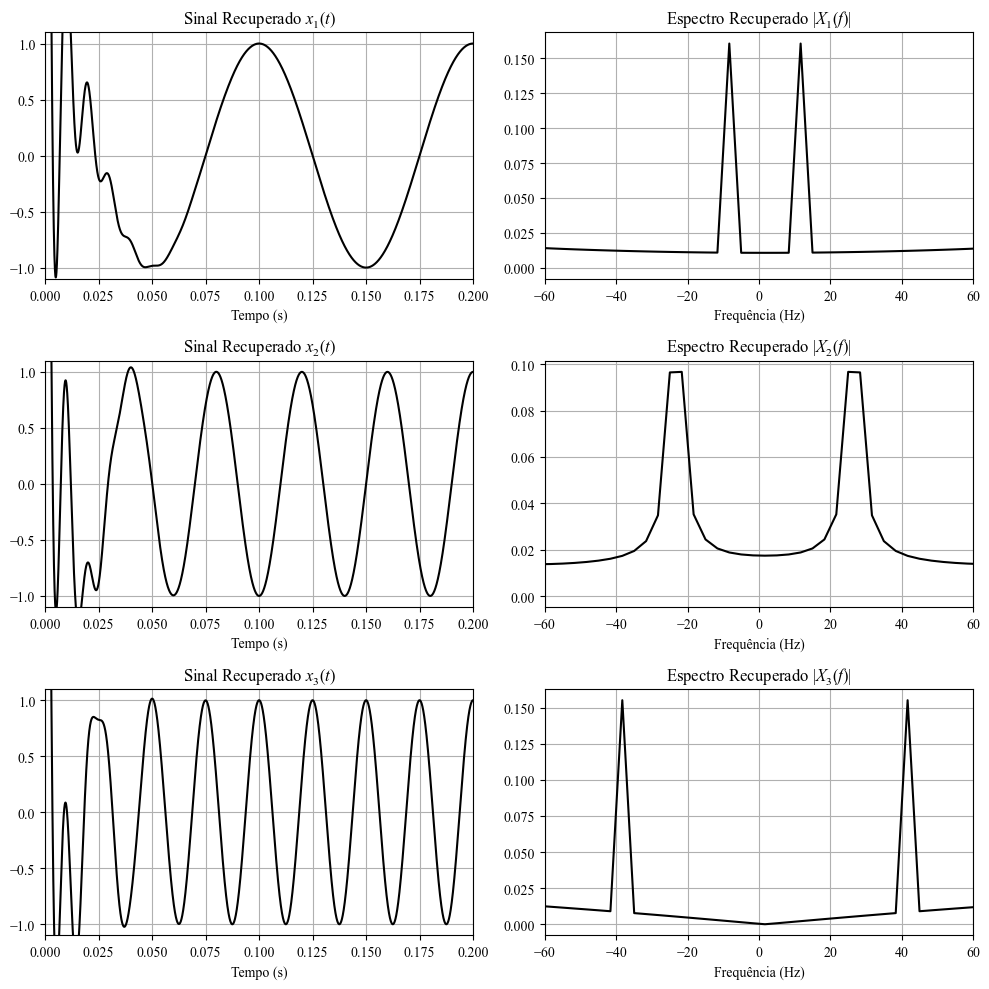

In [140]:
import numpy as np
import numpy.fft as fft
import scipy.signal as signal
import matplotlib.pyplot as plt

#Muda a fonte para Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams['mathtext.rm'] = "Times New Roman"
plt.rcParams['mathtext.it'] = "Times New Roman:italic"
plt.rcParams['mathtext.bf'] = "Times New Roman:bold"


#Funcao para Calcular a Transformada de Fourier
def ctft(x, Ts):
    Fs = 1/Ts
    N = len(x)
    f = np.linspace(-Fs/2, Fs/2, N)
    Xf = fft.fftshift(fft.fft(Ts*x))
    return f, Xf

def aplicar_filtro(sinal, cutoff, fs, ordem=10):
    sos = signal.butter(ordem, cutoff, fs=fs, btype='low', output='sos')
    return signal.sosfiltfilt(sos, sinal)

Fs = 200000 
Ts = 1/Fs
t = np.arange(0, 0.3, Ts) 

x1 = np.cos(20 * np.pi * t) # 10 Hz
x2 = np.cos(50 * np.pi * t) # 25 Hz
x3 = np.cos(80 * np.pi * t) # 40 Hz

fc1, fc2, fc3 = 1100, 2200, 3300
s1 = x1 * np.cos(2 * np.pi * fc1 * t)
s2 = x2 * np.cos(2 * np.pi * fc2 * t)
s3 = x3 * np.cos(2 * np.pi * fc3 * t)
s_fdm = s1 + s2 + s3

fc_main = 25000
s_tx = s_fdm * np.cos(2 * np.pi * fc_main * t)

v_demod_main = s_tx * 2 * np.cos(2 * np.pi * fc_main * t)
s_fdm_rec = aplicar_filtro(v_demod_main, cutoff=5000, fs=Fs, ordem=10)

v1 = s_fdm_rec * 2 * np.cos(2 * np.pi * fc1 * t)
x1_rec = aplicar_filtro(v1, cutoff=100, fs=Fs, ordem=10)

v2 = s_fdm_rec * 2 * np.cos(2 * np.pi * fc2 * t)
x2_rec = aplicar_filtro(v2, cutoff=100, fs=Fs, ordem=10)

v3 = s_fdm_rec * 2 * np.cos(2 * np.pi * fc3 * t)
x3_rec = aplicar_filtro(v3, cutoff=100, fs=Fs, ordem=10)

f, X1f_rec = ctft(x1_rec, Ts)
f, X2f_rec = ctft(x2_rec, Ts)
f, X3f_rec = ctft(x3_rec, Ts)


plt.figure(figsize=(10, 10))

plt.subplot(3, 2, 1)
plt.plot(t, x1_rec, 'k', linewidth=1.5)
plt.title('Sinal Recuperado $x_1(t)$')
plt.xlabel('Tempo (s)'); plt.grid(); plt.xlim(0, 0.2); plt.ylim(-1.1, 1.1)

plt.subplot(3, 2, 2)
plt.plot(f, np.abs(X1f_rec), 'k', linewidth=1.5)
plt.title('Espectro Recuperado $|X_1(f)|$')
plt.xlabel('Frequência (Hz)'); plt.grid(); plt.xlim(-60, 60)

plt.subplot(3, 2, 3)
plt.plot(t, x2_rec, 'k', linewidth=1.5)
plt.title('Sinal Recuperado $x_2(t)$')
plt.xlabel('Tempo (s)'); plt.grid(); plt.xlim(0, 0.2); plt.ylim(-1.1, 1.1)

plt.subplot(3, 2, 4)
plt.plot(f, np.abs(X2f_rec), 'k', linewidth=1.5)
plt.title('Espectro Recuperado $|X_2(f)|$')
plt.xlabel('Frequência (Hz)'); plt.grid(); plt.xlim(-60, 60)

plt.subplot(3, 2, 5)
plt.plot(t, x3_rec, 'k', linewidth=1.5)
plt.title('Sinal Recuperado $x_3(t)$')
plt.xlabel('Tempo (s)'); plt.grid(); plt.xlim(0, 0.2); plt.ylim(-1.1, 1.1)

plt.subplot(3, 2, 6)
plt.plot(f, np.abs(X3f_rec), 'k', linewidth=1.5)
plt.title('Espectro Recuperado $|X_3(f)|$')
plt.xlabel('Frequência (Hz)'); plt.grid(); plt.xlim(-60, 60)

plt.tight_layout()
plt.show()